# <center>ENEM - pt. 10
<hr>

## <center>Inicialização
<hr>

In [6]:
from tcc_funcoes import *
import warnings

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

## <center>Previsões para o LightGBM
<hr>

In [7]:
# dc_teste = abre_arquivo_pickle('dc_teste.pkl')
# dc_treino = abre_arquivo_pickle('dc_treino.pkl')
# dc_lgbm = abre_arquivo_pickle('dc_modelos_lgbm.pkl')

# warnings.filterwarnings("ignore", message="X does not have valid feature names")

# dc_z_teste_lgbm = {}
# dc_z_treino_lgbm = {}

# for nome, dc in dc_lgbm.items():

#     dc_z_teste_lgbm[nome] = {}
#     dc_z_treino_lgbm[nome] = {}

#     x_teste = dc_teste[nome]['x']
#     x_treino = dc_treino[nome]['x']

#     for n_estimators, modelo in dc.items():

#         print(f'Fazendo predições para {nome} com {n_estimators} árvores...')

#         dc_z_teste_lgbm[nome][n_estimators] = modelo.predict(x_teste.to_numpy())
#         dc_z_treino_lgbm[nome][n_estimators] = modelo.predict(x_treino.to_numpy())

#         if nome == 'Redação':

#             dc_z_teste_lgbm[nome][n_estimators] = arredonda_redacao(dc_z_teste_lgbm[nome][n_estimators])
#             dc_z_treino_lgbm[nome][n_estimators] = arredonda_redacao(dc_z_treino_lgbm[nome][n_estimators])

#     print()

# salva_arquivo_pickle('dc_z_teste_lgbm.pkl', dc_z_teste_lgbm)
# salva_arquivo_pickle('dc_z_treino_lgbm.pkl', dc_z_treino_lgbm)

## <center>Métricas para o LightGBM
<hr>

In [8]:
# dc_z_teste_lgbm = abre_arquivo_pickle('dc_z_teste_lgbm.pkl')
# dc_z_treino_lgbm = abre_arquivo_pickle('dc_z_treino_lgbm.pkl')

# warnings.filterwarnings("ignore", message="The behavior of DataFrame concatenation")

# df_resultados = pd.DataFrame(columns=['modelo', 'prova', 'n_estimators', 'rmse_teste', 'mape_teste', 'rmse_treino', 'mape_treino'])

# for nome in dc_z_teste_lgbm.keys():

#     for n_estimators, vetor_teste in dc_z_teste_lgbm[nome].items():
            
#             vetor_treino = dc_z_treino_lgbm[nome][n_estimators]

#             y_teste = dc_teste[nome]['y']
#             y_treino = dc_treino[nome]['y']

#             mse_teste = root_mean_squared_error(y_teste.to_numpy(), vetor_teste)
#             mape_teste = 100 * mean_absolute_percentage_error(y_teste.to_numpy(), vetor_teste)

#             mse_treino = root_mean_squared_error(y_treino.to_numpy(), vetor_treino)
#             mape_treino = 100 * mean_absolute_percentage_error(y_treino.to_numpy(), vetor_treino)

#             dc = {
#                 'modelo': 'LightGBM',
#                 'prova': nome,
#                 'n_estimators': n_estimators,
#                 'rmse_teste': mse_teste,
#                 'mape_teste': mape_teste,
#                 'rmse_treino': mse_treino,
#                 'mape_treino': mape_treino
#             }

#             df_resultados = pd.concat(
#                 [
#                     df_resultados,
#                     pd.DataFrame([dc])
#                 ], ignore_index=True)

# salva_arquivo_pickle('df_resultados_lgbm.pkl', df_resultados)

In [9]:
df_resultados = abre_arquivo_pickle('df_resultados_lgbm.pkl')

Ciências Humanas - Redução do erro MAPE: 0.1896%
Ciências Natureza - Redução do erro MAPE: 0.2257%
Linguagem e Código - Redução do erro MAPE: 0.2286%
Matemática - Redução do erro MAPE: 0.1701%
Redação - Redução do erro MAPE: 0.2250%


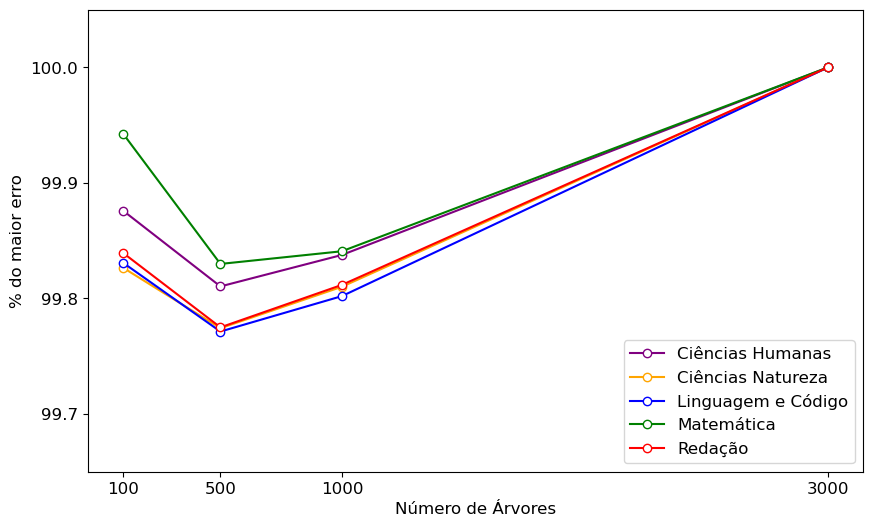

In [10]:
plt.figure(figsize=(10, 6))

plt.xlabel('Número de Árvores', fontsize=12)
plt.ylabel('% do maior erro', fontsize=12)


plt.ylim(99.65, 100.05)

plt.yticks([99.7, 99.8, 99.9, 100], fontsize=12)
plt.xticks([100, 500, 1000, 3000], fontsize=12)

dc_cor = {
    'Redação': 'red',
    'Linguagem e Código': 'blue',
    'Matemática': 'green',
    'Ciências Natureza': 'orange',
    'Ciências Humanas': 'purple'
    }

for prova in df_resultados['prova'].unique():

    data = df_resultados[df_resultados['prova'] == prova]['mape_teste']

    estimadores = df_resultados[df_resultados['prova'] == prova]['n_estimators']

    data_normalizada = 100 * data / data.max()

    plt.plot(
        estimadores,
        data_normalizada,
        marker='o',
        linestyle='-',
        color=dc_cor[prova],
        markerfacecolor='white',
        alpha=1,
        label=prova,
        linewidth=1.5
        )

    print(f'{prova} - Redução do erro MAPE: {data_normalizada.max() - data_normalizada.min():.4f}%')

plt.legend(fontsize=12, loc='lower right')

plt.savefig(f"../texto/imagens/erro_final_lgbm.png", dpi=300, bbox_inches='tight')

plt.show()

In [11]:
provas = df_resultados['prova'].unique()

estimadores = df_resultados['n_estimators'].unique()

print(f"Prova | 100 estimadores | 500 estimadores | 1000 estimadores | 3000 estimadores |")

for prova in provas:

    print(f"{prova} | ", end='')

    for n in estimadores:

        mape = df_resultados.query("prova == @prova and n_estimators == @n")['mape_teste'].values[0]

        print(f"{mape:.3f}% | ", end='')
    print()

Prova | 100 estimadores | 500 estimadores | 1000 estimadores | 3000 estimadores |
Ciências Humanas | 12.321% | 12.313% | 12.316% | 12.336% | 
Ciências Natureza | 10.878% | 10.873% | 10.877% | 10.897% | 
Linguagem e Código | 10.222% | 10.216% | 10.219% | 10.240% | 
Matemática | 15.077% | 15.060% | 15.061% | 15.085% | 
Redação | 21.233% | 21.220% | 21.228% | 21.268% | 
